In [ ]:
# Data loading
import pandas as pd
data = pd.read_csv("car_evaluation.csv")
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# Data extraction
x = data.drop('outcome',axis=True)
y = data[['outcome']]

In [ ]:
# Data encoding and cleaning
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x['buying'] = encoder.fit_transform(x['buying'])
x['maint'] = encoder.fit_transform(x['maint'])
x['lug_boot'] = encoder.fit_transform(x['lug_boot'])
x['safety'] = encoder.fit_transform(x['safety'])

In [ ]:
# Data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
# Model selection
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)

In [ ]:
# Model training
model.fit(x_train, y_train)

<ipython-input-10-3c3c2bb6e084>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [ ]:
# Model prediction
y_pred = model.predict(x_test)

In [ ]:
# Model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

Accuracy:  97.45370370370371
Precision:  0.9753135260838343
Recall:  0.9745370370370371
F1 Score:  0.9746916267579605


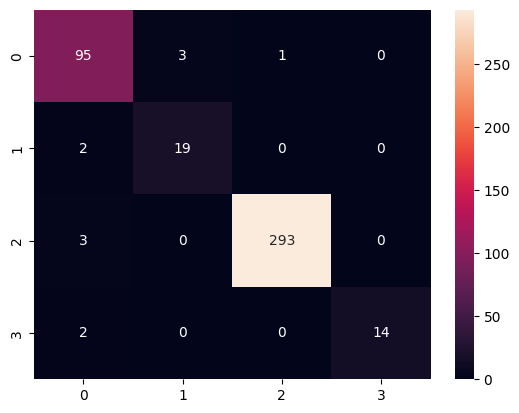

In [ ]:
# Confusion matrix visualization
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

plt.show()